In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from hmmlearn import hmm
from IOHMM_v2 import IOHMM_model

In [2]:
# Generate data
hmm_model = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=100)
hmm_model.startprob_ = np.array([0.0, 1.0])
hmm_model.transmat_ = np.array([[0.9, 0.1],
                                [0.1, 0.9]])
hmm_model.means_ = np.array([[-10.0], [10.0]])
hmm_model.covars_ = np.array([[.1], [.1]])
# Sample data
X, Z = hmm_model.sample(20)
# Dataframe
data = pd.DataFrame(X, columns=['X'])
data['Z'] = Z

output = torch.tensor(data['X'].values, dtype=torch.float32)
input = torch.ones(output.size(), dtype=torch.float32).unsqueeze(1)

In [3]:
print(data)

            X  Z
0   10.067984  1
1   10.138617  1
2   10.203371  1
3   10.069347  1
4  -10.046782  0
5   -9.916584  0
6  -10.339358  0
7   -9.947700  0
8  -10.063378  0
9  -10.126532  0
10 -10.038387  0
11 -10.037107  0
12  -9.953461  0
13 -10.165446  0
14 -10.214173  0
15  -9.895935  0
16  -9.614626  0
17 -10.263516  0
18 -10.020425  0
19  -9.605623  0


In [4]:
print("Input size:", input.size())
print("Output size:", output.size())

Input size: torch.Size([20, 1])
Output size: torch.Size([20])


In [5]:
iohmm = IOHMM_model(num_states=2, inputs=input, outputs=output, max_iter=10, tol=1e-40)

In [6]:
iohmm.baum_welch()

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9


/usr/lib/python3/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


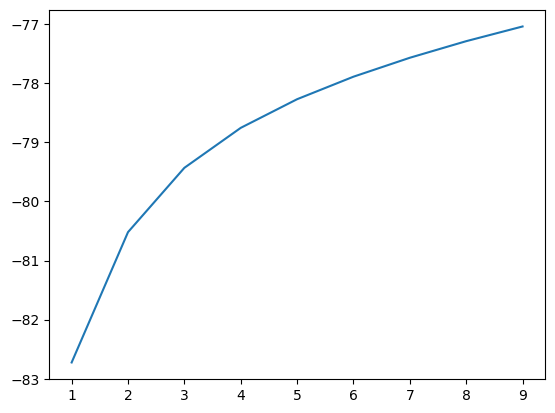

In [7]:
plt.plot(iohmm.history)

In [8]:
iohmm.viterbi()

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]